In [ ]:
#Lab 2

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-epage/Accidental_Drug_Related_Deaths_2012-2024.csv') # Load data from s3
df.head() # Show top 5 rows

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,01/02/2023,Date of death,65.0,Male,White,"No, not Spanish/Hispanic/Latino",BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)","CT\n(41.57350273, -72.738305908)"
1,01/18/2023,Date of death,42.0,Male,White,"No, not Spanish/Hispanic/Latino",WATERBURY,NEW HAVEN,CT,FARMINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"WATERBURY, CT\n(41.5542609, -73.0430692)","FARMINGTON, CT\n(41.726536, -72.8250564)","CT\n(41.57350273, -72.738305908)"
2,01/26/2022,Date of death,34.0,Male,White,NaN,BROOKFIELD,FAIRFIELD,CT,BROOKFIELD,...,Y,NaN,NaN,Y,NaN,Y,NaN,"BROOKFIELD, CT\n(41.46736000000004, -73.398259...","BROOKFIELD, CT\n(41.46736000000004, -73.398259...","CT\n(41.57350273000003, -72.73830590799997)"
3,02/04/2023,Date of death,34.0,Male,White,NaN,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"CT\n(41.57350273, -72.738305908)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
4,02/18/2022,Date of death,43.0,Male,White,NaN,NORWICH,NEW LONDON,CT,NORWICH,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NORWICH, CT\n(41.526760000000024, -72.07567999...","NORWICH, CT\n(41.526760000000024, -72.07567999...","CT\n(41.57350273000003, -72.73830590799997)"


In [8]:
#Part A: View the data

print("\n1. First 5 rows of the dataset (head):")
print(df.head())

print("\n2. Shape of the dataset (rows, columns):")
print(df.shape)

print("\n3. Information about the dataset (info):")
df.info()

print("\n4. Descriptive statistics for numeric columns (describe):")
print(df.describe())

# The dataset contains 12,024 rows and 43 columns.
# Columns consist of numeric, Objective, and Dates


1. First 5 rows of the dataset (head):
         Date      Date Type   Age   Sex   Race  \
0  01/02/2023  Date of death  65.0  Male  White   
1  01/18/2023  Date of death  42.0  Male  White   
2  01/26/2022  Date of death  34.0  Male  White   
3  02/04/2023  Date of death  34.0  Male  White   
4  02/18/2022  Date of death  43.0  Male  White   

                         Ethnicity Residence City Residence County  \
0  No, not Spanish/Hispanic/Latino     BRIDGEPORT        FAIRFIELD   
1  No, not Spanish/Hispanic/Latino      WATERBURY        NEW HAVEN   
2                              NaN     BROOKFIELD        FAIRFIELD   
3                              NaN            NaN              NaN   
4                              NaN        NORWICH       NEW LONDON   

  Residence State Injury City  ... Xylazine Gabapentin Opiate NOS  \
0              CT  BRIDGEPORT  ...        N        NaN        NaN   
1              CT  FARMINGTON  ...        N        NaN        NaN   
2              CT  BROOKF

In [10]:
#Part B: Clean the data 

# 1. Rename a column for easier access
df.rename(columns={'Cause of Death': 'CauseOfDeath'}, inplace=True)
print(f"\n1. Renamed 'Cause of Death' column to 'CauseOfDeath'. New columns: {df.columns.tolist()}")

# 2. Check for missing values
print("\n2. Sum of missing values in each column:")
print(df.isnull().sum())

# 3. Handle missing values
initial_rows = df.shape[0]
df.dropna(subset=['Age', 'Sex'], inplace=True)
print(f"\n3. Dropped rows with missing 'Age' or 'Sex'. Removed {initial_rows - df.shape[0]} rows.")

drug_cols = ['Heroin', 'Cocaine', 'Fentanyl', 'Ethanol', 'Benzodiazepine', 'Methadone', 'Xylazine']
for col in drug_cols:
    if col in df.columns:
        df[col].fillna('N', inplace=True)
print("\nFilled NaN values in key drug columns with 'N'.")

# I renamed the column 'Cause of Death' to 'CauseOfDeath' to remove the spaces.


1. Renamed 'Cause of Death' column to 'CauseOfDeath'. New columns: ['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State', 'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury', 'Death City', 'Death County', 'Death State', 'Location', 'Location if Other', 'CauseOfDeath', 'Manner of Death', 'Other Significant Conditions ', 'Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']

2. Sum of missing values in each column:
Date                                 0
Date Type                            0
Age                                  0
Sex           

In [11]:
# Part C: Manipulate the data

# 1. Select and display one column ('Age')
print("\n1. Displaying the 'Age' column:")
print(df['Age'])

# 2. Sort rows by the 'Age' column in descending order
df_sorted_by_age = df.sort_values(by='Age', ascending=False)
print("\n2. Dataset sorted by 'Age' (descending):")
print(df_sorted_by_age.head())

# 3. Slice 5-10 rows (we'll slice rows 5 through 10 from the sorted data)
print("\n3. Slicing rows 5 through 10 of the age-sorted data:")
print(df_sorted_by_age.iloc[5:11])

# 4. Filter rows with a condition (Age > 85)
print("\n4. Filtering for deaths where Age was greater than 85:")
print(df[df['Age'] > 85][['Date', 'Age', 'Sex', 'Race', 'CauseOfDeath']])

# Markdown for Part C:
#
# I selected the 'Age' column to see the age distribution of the cases.
#  I sorted the entire dataset by the 'Age' column in descending order to see the oldest people in the dataset.
# I sliced the 6th through 11th rows from the age-sorted data to view a specific subset of the results.
# I put a filter to find all cases where the age of death was greater than 85.


1. Displaying the 'Age' column:
0        65.0
1        42.0
2        34.0
3        34.0
4        43.0
         ... 
12958    48.0
12959    53.0
12960    31.0
12961    66.0
12962    53.0
Name: Age, Length: 12953, dtype: float64

2. Dataset sorted by 'Age' (descending):
             Date      Date Type   Age     Sex             Race  \
11065  07/14/2013  Date of death  87.0    Male            White   
6274   05/04/2018  Date of death  84.0    Male            White   
12379  06/16/2024  Date of death  81.0    Male  Other (Specify)   
8590   09/03/2020  Date of death  81.0    Male            Black   
9968   06/21/2014  Date of death  81.0  Female            White   

                                Ethnicity Residence City Residence County  \
11065                            Hispanic      NEW HAVEN        NEW HAVEN   
6274                             Hispanic     BRIDGEPORT        FAIRFIELD   
12379  Yes, other Spanish/Hispanic/Latino       HARTFORD         HARTFORD   
8590               

In [13]:
#Part D: Group & Visualize the data

# First, convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df.dropna(subset=['Year'], inplace=True) # Drop rows where date conversion failed
df['Year'] = df['Year'].astype(int)

# 1. Group by Year
deaths_by_year = df.groupby('Year').size().reset_index(name='TotalDeaths')
print("\n1. Total deaths grouped by year:")
print(deaths_by_year)

# 2. Group by Sex 
deaths_by_sex = df['Sex'].value_counts().reset_index()
deaths_by_sex.columns = ['Sex', 'TotalDeaths']
print("\n2. Total deaths grouped by sex:")
print(deaths_by_sex)


1. Total deaths grouped by year:
    Year  TotalDeaths
0   2012          355
1   2013          490
2   2014          557
3   2015          729
4   2016          917
5   2017         1036
6   2018         1017
7   2019         1199
8   2020         1370
9   2021         1523
10  2022         1451
11  2023         1327
12  2024          982

2. Total deaths grouped by sex:
       Sex  TotalDeaths
0     Male         9570
1   Female         3380
2  Unknown            2
3        X            1


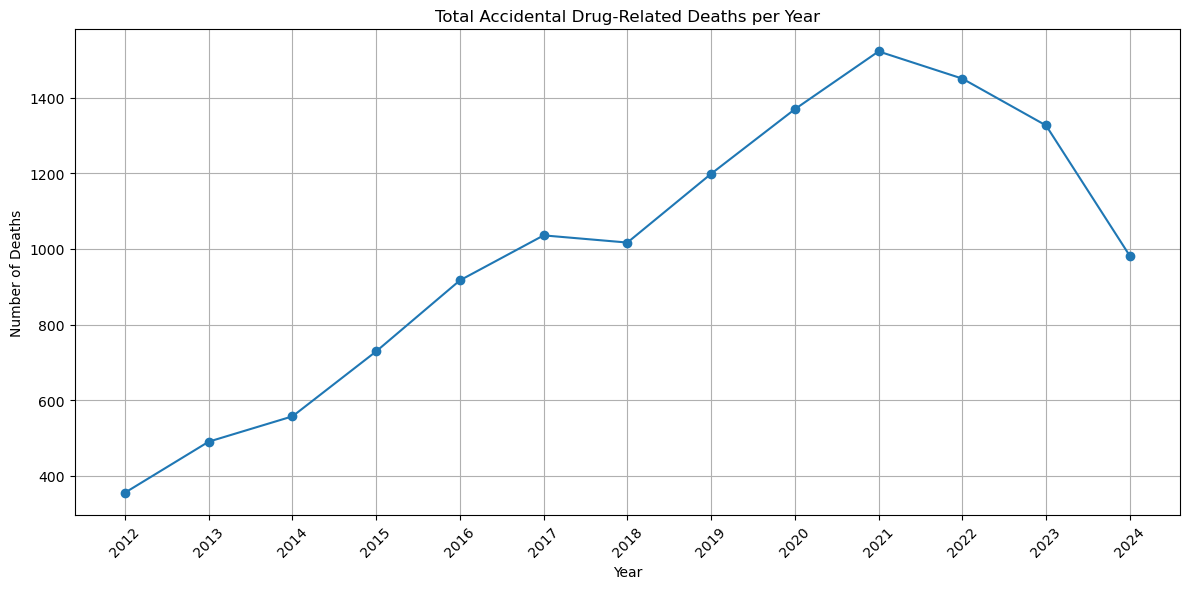

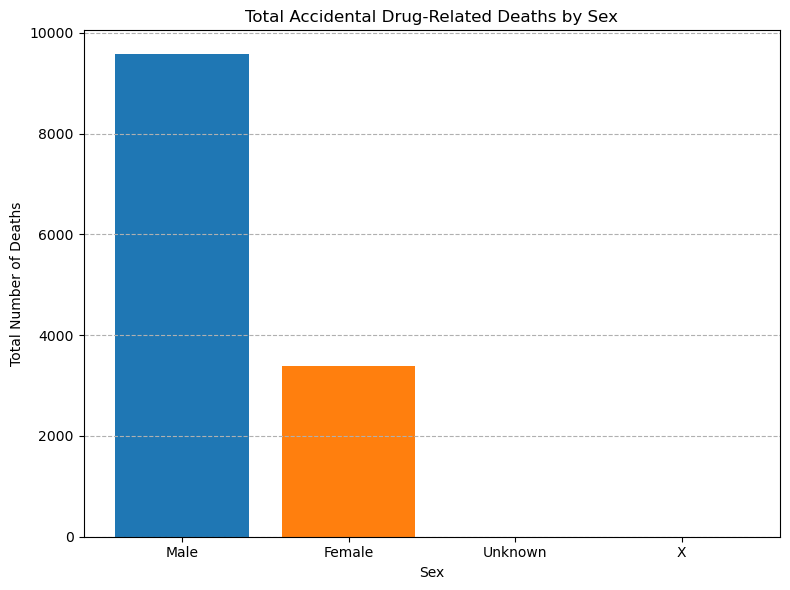

In [21]:
import matplotlib.pyplot as plt
# Plot 1: Line plot of deaths over time
plt.figure(figsize=(12, 6))
plt.plot(deaths_by_year['Year'], deaths_by_year['TotalDeaths'], marker='o', linestyle='-')
plt.title('Total Accidental Drug-Related Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.xticks(deaths_by_year['Year'], rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Bar chart of deaths by sex
plt.figure(figsize=(8, 6))
plt.bar(deaths_by_sex['Sex'], deaths_by_sex['TotalDeaths'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Total Accidental Drug-Related Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Number of Deaths')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
